### PCA

In [175]:
import pandas as pd
import numpy as np
path = './data/default of credit card clients.xls'
data = pd.read_excel(path, header =1, index_col=0)

In [176]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [177]:
data[data.columns[5:11]]
data[data.columns[11:17]]
data[data.columns[17:23]]

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,
1,0,689,0,0,0,0
2,0,1000,1000,1000,0,2000
3,1518,1500,1000,1000,1000,5000
4,2000,2019,1200,1100,1069,1000
5,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...
29996,8500,20000,5003,3047,5000,1000
29997,1837,3526,8998,129,0,0
29998,0,0,22000,4200,2000,3100


In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x, test_x, train_y, test_y = train_test_split(data.drop(data.columns[-1], axis = 1), data[data.columns[-1]])
train_x = pd.DataFrame(ss.fit_transform(train_x), columns = train_x.columns)
test_x = pd.DataFrame(ss.transform(test_x), columns = train_x.columns)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(22500, 23) (22500,)
(7500, 23) (7500,)


PAY_


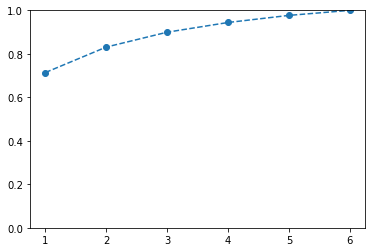

BILL_AMT


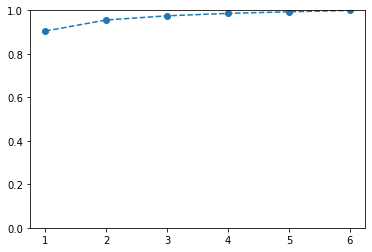

PAY_AMT


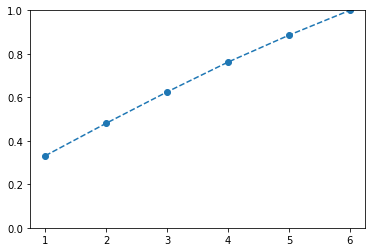

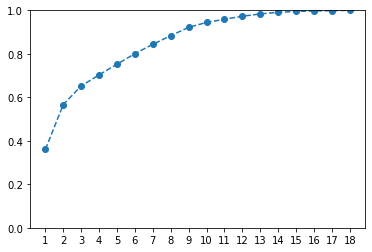

In [179]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
for i in [5,11,17]:
    pca = PCA(6)
    pca.fit(train_x[train_x.columns[i:i+6]])
    ratio = np.cumsum(pca.explained_variance_ratio_)
    print(train_x.columns[i][:-1])
    plt.plot(range(1,7), ratio, 'o--')
    plt.ylim((0,1))
    plt.show()

pca = PCA(18)
pca.fit(train_x[train_x.columns[5:23]])
ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,19), ratio, 'o--')
plt.ylim((0,1))
plt.xticks(range(1,19))
plt.show()

In [180]:
pca = PCA(0.98)
pca.fit(train_x[train_x.columns[5:23]])
pca_pay_train_x = pca.transform(train_x[train_x.columns[5:23]])
pca_pay_test_x = pca.transform(test_x[test_x.columns[5:23]])

print(sum(pca.explained_variance_ratio_))
print(pca.n_components_)

0.9836070311380841
13


In [181]:
['PCA_'+str(i) for i in range(pca.n_components_)]

['PCA_0',
 'PCA_1',
 'PCA_2',
 'PCA_3',
 'PCA_4',
 'PCA_5',
 'PCA_6',
 'PCA_7',
 'PCA_8',
 'PCA_9',
 'PCA_10',
 'PCA_11',
 'PCA_12']

In [182]:
pca_pay_train_x = pd.DataFrame(pca_pay_train_x, columns = ['PCA_'+str(i) for i in range(pca.n_components_)])
pca_pay_test_x = pd.DataFrame(pca_pay_test_x, columns = ['PCA_'+str(i) for i in range(pca.n_components_)])
pca_train_x = pd.concat([train_x.drop(train_x.columns[5:23], axis = 1).reset_index( drop= True),pca_pay_train_x], axis = 1)
pca_test_x = pd.concat([test_x.drop(test_x.columns[5:23], axis = 1).reset_index( drop= True),pca_pay_test_x], axis = 1)
print(pca_train_x.shape, train_y.shape)
print(pca_test_x.shape, test_y.shape)

(22500, 18) (22500,)
(7500, 18) (7500,)


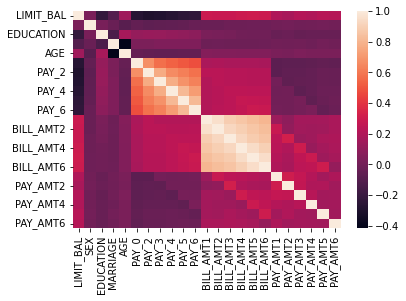

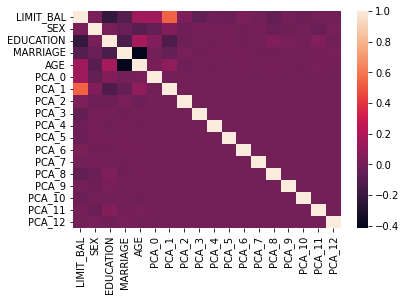

In [183]:
import seaborn as sns
sns.heatmap(train_x.corr())
plt.show()
sns.heatmap(pca_train_x.corr())
plt.show()


In [184]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=200)
pca_logit = LogisticRegression()
logit.fit(train_x, train_y)
pca_logit.fit(pca_train_x, train_y)

LogisticRegression()

In [185]:
from sklearn.metrics import roc_auc_score
print(logit.score(test_x, test_y), roc_auc_score(test_y,logit.predict(test_x)))
print(pca_logit.score(pca_test_x, test_y), roc_auc_score(test_y,pca_logit.predict(pca_test_x)))

0.8034666666666667 0.6044804275047653
0.8028 0.6022196235893431


In [186]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
pca_rf = RandomForestClassifier()
rf.fit(train_x, train_y)
pca_rf.fit(pca_train_x, train_y)

RandomForestClassifier()

In [187]:
print(rf.score(test_x, test_y), roc_auc_score(test_y,rf.predict(test_x)))
print(pca_rf.score(pca_test_x, test_y), roc_auc_score(test_y,pca_rf.predict(pca_test_x)))

0.8104 0.655694544730624
0.8068 0.6482791761205484


In [215]:
card_pca_train_x, card_train_y = pca_train_x, train_y
card_pca_test_x, card_test_y = pca_test_x, test_y

### DBscan

#### 비원형 데이터의 군집화 - DBSCAN
---
- 분할적 군집화 방식
- 밀도(데이터의 밀집)기반 군집화 >> 미리 군집 수 지정 필요 없음
- 다양한 형태의 데이터에서 군집화 가능
- 이상치 데이터 제거도 가능
- 군집을 정하는 기준
    - 임의의 점(point)에서 지정된 거리 만큼 영역 내 데이터 존재 수

In [1]:
from sklearn.datasets import load_iris
input_data, target = load_iris(return_X_y=True, as_frame=True)

In [2]:
input_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
ss = StandardScaler()
ss_input_data = pd.DataFrame(ss.fit_transform(input_data))


In [10]:
# 군집화 객체 생성
db = DBSCAN()
db.fit(ss_input_data)
result = db.labels_
result

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

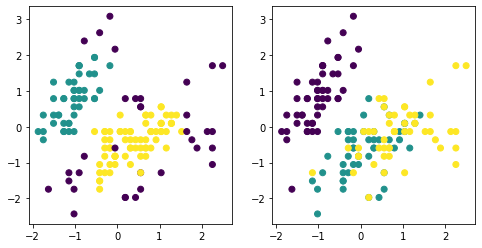

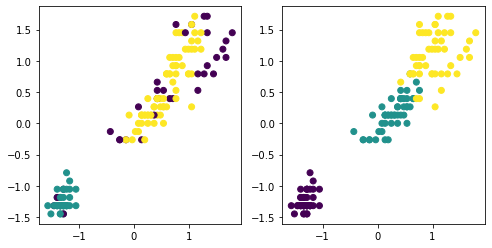

In [21]:
import matplotlib.pyplot as plt
for i in [0,2]:
    plt.figure(figsize = (8,4))
    plt.subplot(1,2,1)
    plt.scatter(ss_input_data[ss_input_data.columns[i]],
               ss_input_data[ss_input_data.columns[i+1]],
               c= result+1)

    plt.subplot(1,2,2)
    plt.scatter(ss_input_data[ss_input_data.columns[i]],
               ss_input_data[ss_input_data.columns[i+1]],
               c= target)
    plt.show()

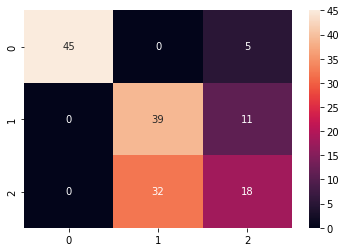

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(target, np.where(db.labels_ == -1 , 2, db.labels_)), annot = True)
plt.show()

### keras scikitrean

In [37]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [100]:
def get_model(n_nodes, n_layer, meta):
    input_shape = meta['X_shape_'][1:]
    output_n_labels = meta['n_classes_']
    model = Sequential()
    model.add(Dense(n_nodes, activation='relu', input_shape =input_shape))
    for i in range(n_layer-1):
        model.add(Dense(n_nodes, activation='relu'))
    model.add(Dense(output_n_labels, activation='softmax'))
    
    return model

In [140]:
k_cl = KerasClassifier(get_model,
                       loss = 'sparse_categorical_crossentropy',
                       n_nodes = 10,
                       n_layer = 1,
                       optimizer='adam',
                       metrics = 'accuracy',
                       epochs=30,
                       verbose = 0                       
                      )

In [141]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =  train_test_split(np.array(ss_input_data), np.array(target))

In [145]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_nodes' : [30,50],
    'n_layer' : [3,5]
}
gs = GridSearchCV(k_cl,
                  param_grid=params,
                  scoring='accuracy',
                  verbose=1
                 )

In [146]:
gs.fit(train_x, train_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=KerasClassifier(epochs=30, loss='sparse_categorical_crossentropy', metrics='accuracy', model=<function get_model at 0x0000029BA8366670>, n_layer=1, n_nodes=10, optimizer='adam', verbose=0),
             param_grid={'n_layer': [3, 5], 'n_nodes': [30, 50]},
             scoring='accuracy', verbose=1)

In [147]:
gs.best_score_

0.9375494071146246

In [148]:
gs.best_estimator_

KerasClassifier(
	model=<function get_model at 0x0000029BA8366670>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=sparse_categorical_crossentropy
	metrics=accuracy
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=30
	n_nodes=50
	n_layer=5
	class_weight=None
)

In [155]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import set_random_seed
set_random_seed(493)
es_cb = EarlyStopping(monitor = 'val_loss', patience=3)
model = gs.best_estimator_
model.validation_split = 0.2
model.verbose = 1
model.fit(train_x, train_y,
         callbacks = [es_cb])

Epoch 1/30
3/3 [==============================] - 3s 239ms/step - loss: 1.0992 - accuracy: 0.2584 - val_loss: 1.0571 - val_accuracy: 0.6087
Epoch 2/30
3/3 [==============================] - 0s 36ms/step - loss: 1.0502 - accuracy: 0.7191 - val_loss: 1.0083 - val_accuracy: 0.9565
Epoch 3/30
3/3 [==============================] - 0s 39ms/step - loss: 1.0051 - accuracy: 0.8315 - val_loss: 0.9534 - val_accuracy: 0.9565
Epoch 4/30
3/3 [==============================] - 0s 39ms/step - loss: 0.9509 - accuracy: 0.8315 - val_loss: 0.8861 - val_accuracy: 0.9565
Epoch 5/30
3/3 [==============================] - 0s 37ms/step - loss: 0.8796 - accuracy: 0.8315 - val_loss: 0.8072 - val_accuracy: 0.9130
Epoch 6/30
3/3 [==============================] - 0s 37ms/step - loss: 0.7999 - accuracy: 0.8202 - val_loss: 0.7128 - val_accuracy: 0.8696
Epoch 7/30
3/3 [==============================] - 0s 34ms/step - loss: 0.7129 - accuracy: 0.8090 - val_loss: 0.6114 - val_accuracy: 0.8696
Epoch 8/30
3/3 [==========

KerasClassifier(
	model=<function get_model at 0x0000029BA8366670>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=sparse_categorical_crossentropy
	metrics=accuracy
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=30
	n_nodes=50
	n_layer=5
	class_weight=None
)

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, model.predict(test_x))

2/2 [==============================] - 0s 4ms/step


0.8947368421052632

#### 신용카드 gridsearch

In [216]:
print(card_pca_train_x.shape, card_train_y.shape)
print(card_pca_test_x.shape, card_test_y.shape)

(22500, 18) (22500,)
(7500, 18) (7500,)


In [217]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
card_train_y = encoder.fit_transform(np.array(card_train_y).reshape(-1,1)).toarray()
card_test_y = encoder.transform(np.array(card_test_y).reshape(-1,1)).toarray()

In [218]:
print(card_pca_train_x.shape, card_train_y.shape)
print(card_pca_test_x.shape, card_test_y.shape)

(22500, 18) (22500, 2)
(7500, 18) (7500, 2)


In [219]:
from tensorflow.keras.utils import set_random_seed

def get_model(n_nodes, n_layer, meta):
    set_random_seed(493)
    input_shape = meta['X_shape_'][1:]
    output_n_labels = meta['n_classes_']
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape =input_shape))
    for i in range(n_layer):
        model.add(Dense(n_nodes[i], activation='relu'))
    model.add(Dense(output_n_labels, activation='sigmoid'))
    
    return model

In [226]:
from tensorflow.keras.callbacks import EarlyStopping
es_cb = EarlyStopping(monitor = 'val_loss', patience=3)
k_cl = KerasClassifier(get_model,
                       loss = 'binary_crossentropy',
                       n_nodes = 10,
                       n_layer = 1,
                       optimizer='adam',
                       metrics = 'accuracy',
                       epochs=10,
                       validation_split=0.2,
                       callbacks=[es_cb],
                       verbose = 1                       
                      )

In [229]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_nodes' : [[20,30,40],[10,20,30]],
    'n_layer' : [2,3]
}
gs = GridSearchCV(k_cl,
                  param_grid=params,
                  scoring='accuracy',
                  verbose=1
                 )

In [230]:
gs.fit(card_pca_train_x, card_train_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/10
450/450 [==============================] - 4s 6ms/step - loss: 0.4947 - accuracy: 0.7935 - val_loss: 0.4627 - val_accuracy: 0.8186
Epoch 2/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4493 - accuracy: 0.8193 - val_loss: 0.4499 - val_accuracy: 0.8200
Epoch 3/10
450/450 [==============================] - 3s 6ms/step - loss: 0.4409 - accuracy: 0.8207 - val_loss: 0.4474 - val_accuracy: 0.8197
Epoch 4/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4367 - accuracy: 0.8215 - val_loss: 0.4447 - val_accuracy: 0.8228
Epoch 5/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4328 - accuracy: 0.8222 - val_loss: 0.4446 - val_accuracy: 0.8194
Epoch 6/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4302 - accuracy: 0.8225 - val_loss: 0.4449 - val_accuracy: 0.8189
Epoch 7/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4284 - accur

450/450 [==============================] - 2s 5ms/step - loss: 0.4326 - accuracy: 0.8222 - val_loss: 0.4413 - val_accuracy: 0.8203
Epoch 7/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4315 - accuracy: 0.8221 - val_loss: 0.4390 - val_accuracy: 0.8225
Epoch 8/10
450/450 [==============================] - 2s 4ms/step - loss: 0.4298 - accuracy: 0.8223 - val_loss: 0.4406 - val_accuracy: 0.8181
Epoch 9/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4282 - accuracy: 0.8224 - val_loss: 0.4389 - val_accuracy: 0.8211
Epoch 10/10
141/141 [==============================] - 1s 3ms/step
Epoch 1/10
450/450 [==============================] - 4s 5ms/step - loss: 0.4980 - accuracy: 0.8003 - val_loss: 0.4627 - val_accuracy: 0.8183
Epoch 2/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4429 - accuracy: 0.8208 - val_loss: 0.4480 - val_accuracy: 0.8181
Epoch 3/10
450/450 [==============================] - 2s 4ms/step - loss: 0.4328 - accuracy:

450/450 [==============================] - 4s 6ms/step - loss: 0.4856 - accuracy: 0.7991 - val_loss: 0.4591 - val_accuracy: 0.8161
Epoch 2/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4366 - accuracy: 0.8219 - val_loss: 0.4449 - val_accuracy: 0.8197
Epoch 3/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4281 - accuracy: 0.8253 - val_loss: 0.4422 - val_accuracy: 0.8175
Epoch 4/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4244 - accuracy: 0.8252 - val_loss: 0.4392 - val_accuracy: 0.8197
Epoch 5/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4210 - accuracy: 0.8267 - val_loss: 0.4398 - val_accuracy: 0.8178
Epoch 6/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4195 - accuracy: 0.8272 - val_loss: 0.4385 - val_accuracy: 0.8197
Epoch 7/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4171 - accuracy: 0.8285 - val_loss: 0.4367 - val_accuracy: 0.8175
Epoch 8/10
450/45

Epoch 10/10
141/141 [==============================] - 1s 3ms/step
Epoch 1/10
450/450 [==============================] - 4s 6ms/step - loss: 0.5157 - accuracy: 0.7817 - val_loss: 0.4730 - val_accuracy: 0.8094
Epoch 2/10
450/450 [==============================] - 2s 4ms/step - loss: 0.4504 - accuracy: 0.8142 - val_loss: 0.4511 - val_accuracy: 0.8158
Epoch 3/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4373 - accuracy: 0.8215 - val_loss: 0.4461 - val_accuracy: 0.8153
Epoch 4/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4327 - accuracy: 0.8227 - val_loss: 0.4413 - val_accuracy: 0.8175
Epoch 5/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4287 - accuracy: 0.8242 - val_loss: 0.4424 - val_accuracy: 0.8172
Epoch 6/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4266 - accuracy: 0.8247 - val_loss: 0.4408 - val_accuracy: 0.8181
Epoch 7/10
450/450 [==============================] - 2s 5ms/step - loss: 0.4253 

GridSearchCV(estimator=KerasClassifier(callbacks=[<keras.callbacks.EarlyStopping object at 0x0000029BCDB6CE80>], epochs=10, loss='binary_crossentropy', metrics='accuracy', model=<function get_model at 0x0000029BCC01C670>, n_layer=1, n_nodes=10, optimizer='adam', validation_split=0.2),
             param_grid={'n_layer': [2, 3],
                         'n_nodes': [[20, 30, 40], [10, 20, 30]]},
             scoring='accuracy', verbose=1)

In [231]:
gs.best_score_

0.8226222222222223

In [239]:
gs.best_estimator_

KerasClassifier(
	model=<function get_model at 0x0000029BCC01C670>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=binary_crossentropy
	metrics=accuracy
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x0000029BD035DA90>]
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=50
	n_nodes=[20, 30, 40]
	n_layer=3
	class_weight=None
)

In [ ]:
set_random_seed(493)
es_cb = EarlyStopping(monitor = 'val_loss', patience=3)
model = gs.best_estimator_
model.fit(train_x, train_y,
         callbacks = [es_cb])

In [245]:
from tensorflow.keras.utils import plot_model
set_random_seed(493)
final_model = gs.best_estimator_
final_model.epochs = 50
print(final_model.callbacks)
final_model.fit(card_pca_train_x, card_train_y)

Epoch 1/50
563/563 [==============================] - 5s 6ms/step - loss: 0.4806 - accuracy: 0.8022 - val_loss: 0.4549 - val_accuracy: 0.8153
Epoch 2/50
563/563 [==============================] - 3s 5ms/step - loss: 0.4401 - accuracy: 0.8208 - val_loss: 0.4458 - val_accuracy: 0.8149
Epoch 3/50
563/563 [==============================] - 4s 6ms/step - loss: 0.4334 - accuracy: 0.8234 - val_loss: 0.4421 - val_accuracy: 0.8151
Epoch 4/50
563/563 [==============================] - 4s 8ms/step - loss: 0.4297 - accuracy: 0.8241 - val_loss: 0.4516 - val_accuracy: 0.8087
Epoch 5/50
563/563 [==============================] - 3s 6ms/step - loss: 0.4269 - accuracy: 0.8254 - val_loss: 0.4421 - val_accuracy: 0.8162
Epoch 6/50
563/563 [==============================] - 3s 6ms/step - loss: 0.4252 - accuracy: 0.8252 - val_loss: 0.4402 - val_accuracy: 0.8127
Epoch 7/50
563/563 [==============================] - 3s 6ms/step - loss: 0.4237 - accuracy: 0.8249 - val_loss: 0.4370 - val_accuracy: 0.8160
Epoch 

KerasClassifier(
	model=<function get_model at 0x0000029BCC01C670>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=binary_crossentropy
	metrics=accuracy
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x0000029BD035DA90>]
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=50
	n_nodes=[20, 30, 40]
	n_layer=3
	class_weight=None
)

In [250]:
from sklearn.metrics import accuracy_score, roc_auc_score
pred = final_model.predict(card_pca_test_x)
print(accuracy_score(card_test_y, pred))
print(roc_auc_score(card_test_y, pred))

235/235 [==============================] - 1s 4ms/step
0.8106666666666666
0.6430729353344455


In [251]:
final_model.score(card_pca_train_x, card_train_y)

704/704 [==============================] - 3s 4ms/step


0.8258222222222222